# Game of Life

In [1]:
# Team Members:            Jenni, Ashton, and Isaac
# Last Modification Date:  09/14/2023
# Program Name:            Game of Life
# Program Description:     This program simulates the John Conway's Game of Life
# Notes:                   This Game of Life implements an "infinite" border.

## Function

### Rules:

1) *Each cell with one or no neighbors dies, as if by solitude.*
2) *Each cell with four or more neighbors dies, as if by overpopulation.*
3) *Each cell with three neighbors becomes populated.*
4) *Each cell with two or three neighbors survives.*


In [2]:
using Plots

In [11]:
function CountingNeighbors(Board, CountBoard, i, j)
    rowArray = [ 0,  -1, -1, -1, 0, 1, 1,  1];
    colArray = [-1, -1,  0,  1, 1, 1, 0, -1];
    
    # Check each neighbor. Each cell has a total of 8 neighbors. 
    # I would keep a neighbors alives count.
    neighborCount = 0;

    for k in 1:8
        row = i + rowArray[k];
        col = j + colArray[k];

        #Check for out of bounds
        if (row == 0)
            row = n;
        elseif (row == (n + 1))
            row = 1;
        end

        if (col == 0)
            col = n;
        elseif (col == (n + 1))
            col = 1;
        end

        if (Board[row, col] == 1)
            neighborCount += 1;
        end
    end

    CountBoard[i, j] = neighborCount;
end

CountingNeighbors (generic function with 2 methods)

In [12]:
function DeadOrAlive(Board, n)
    CountBoard = zeros(n, n);

    for i in 1:n
        for j in 1:n
            CountingNeighbors(Board, CountBoard, i, j);
        end
    end
    
    for i in 1:n
        for j in 1:n  
            # Rule 1: Each cell with one or no neighbors dies, as if by solitude.
            if (CountBoard[i, j] < 2)
                Board[i, j] = 0;

            # Rule 2: Each cell with four or more neighbors dies, as if by overpopulation.
            elseif (CountBoard[i, j] > 3)
                Board[i, j] = 0;

            # Rule 3: Each cell with three neighbors becomes populated.
            elseif (CountBoard[i, j] == 3)
                Board[i, j] = 1;

            # Rule 4: Each cell with two or three neighbors survives.
            else
                # Do nothing
            end
        end
    end
end

DeadOrAlive (generic function with 1 method)

## Game

72×72 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  1  0  1  1  1  1  1  0     1  1  0  0  0  0  1  1  0  0  0  0
 0  0  0  0  0  1  0  0  1  1  0  0  1  …  1  0  1  1  0  1  1  1  0  0  0  0
 0  0  0  0  0  1  0  1  0  1  0  1  1     0  0  1  1  0  0  0  0  0  0  0  0
 0  0  0  0  0  1  0  0  1  0  0  1  1     0  0  1  0  1  0  0  1  0  0  0  0
 0  0  0  0  1  1  0  0  0  1  0  0  0     1  0  1  1  1  0  1  1  0  0  0  0
 0  0  0  0  0  1  0  1  0  0  1  0  0     0  1  0  0  1  1  1  1  0  0  0  0
 0  0  0  0  0  0  1  1  1  0  1  1  1  …  0  1  1  1  0  0  1  1  0  0  0  0
 0  0  0  0  1  0  0  1  1  0  1  1  1     1  0  1  1  1  1  0  1  0  0  0  0
 0  0  0  0  0  0  1  0  1  0  1  1  1     

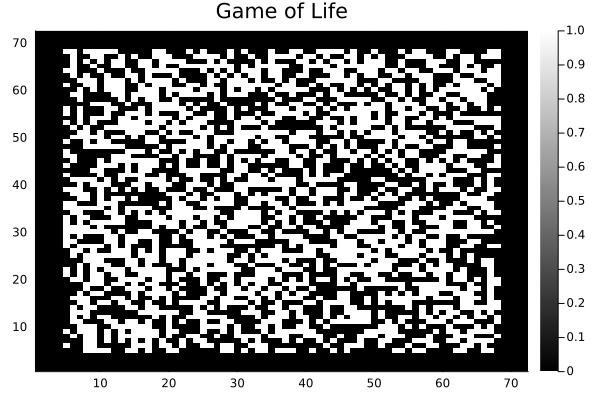

In [44]:
n = 64;
Board = rand((0, 1), (n, n))

n = 72;
CheatingBoard = zeros(Int64, n, n)

CheatingBoard[5:n-4, 5:n-4] += Board;

display(CheatingBoard)

gr()
Plots.heatmap(
    CheatingBoard[end:-1:1, 1:1:end],
    c = cgrad([:black, :white]),
    title = "Game of Life"
)

[ Info: Saved animation to C:\Users\isaac\Desktop\Redactando\MA 2600\anim_fps16.gif


Plots.AnimatedGif("C:\\Users\\isaac\\Desktop\\Redactando\\MA 2600\\anim_fps16.gif")
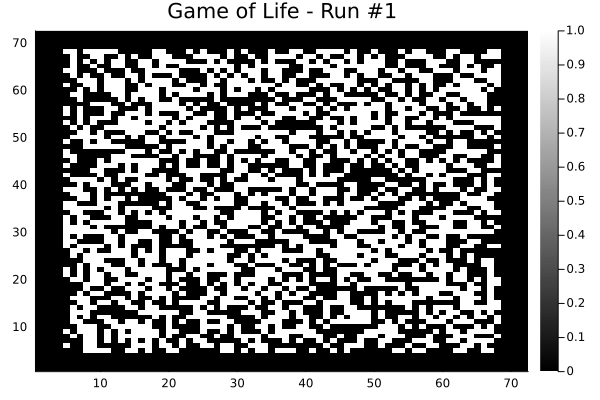

In [45]:
gr()

animation = @animate for i ∈ 1:100
    Plots.heatmap(
        CheatingBoard[end:-1:1, 1:1:end],
        c = cgrad([:black, :white]),
        title = LazyString("Game of Life - Run #", i)
    )
    DeadOrAlive(CheatingBoard, n)
end

gif(animation, "anim_fps16.gif", fps = 2)

## Test

Use https://playgameoflife.com/ to test the code. 
1) The initial state of the game of life should match the heatmap below.
2) Click on "next", the resulting shape should match the second heatmap below.
3) You can keep clicking on "next" a running the last cell. The shapes should match.

5×5 Matrix{Int64}:
 0  0  0  0  0
 0  0  1  0  0
 0  0  0  1  0
 0  1  1  1  0
 0  0  0  0  0

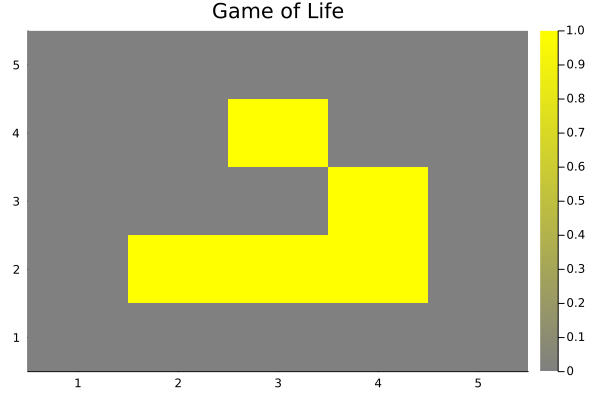

In [22]:
n = 5;
test = [0 0 0 0 0 ; 0 0 1 0 0 ; 0 0 0 1 0 ; 0 1 1 1 0 ; 0 0 0 0 0];
display(test)
Plots.heatmap(
    test[end:-1:1, 1:1:end],
    c = cgrad([:gray, :yellow]),
    title = "Game of Life"
)

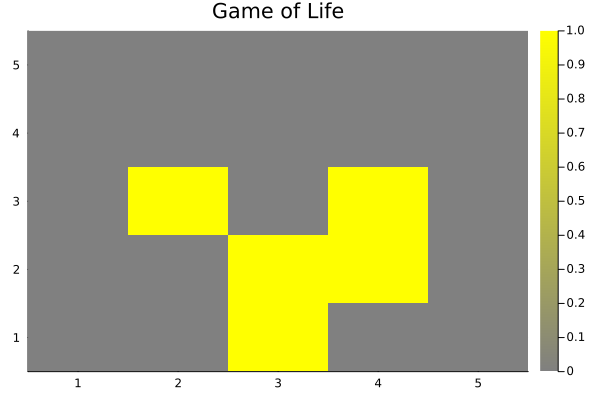

In [23]:
DeadOrAlive(test, 5)
Plots.heatmap(
    test[end:-1:1, 1:1:end],
    c = cgrad([:gray, :yellow]),
    title = "Game of Life"
)